In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

D:\Python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [18]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [22]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [23]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

In [30]:
cnn = Sequential()

#Block 1
cnn.add(Conv2D(input_shape=(28,28, 1), activation = 'relu', kernel_size = (3,3), filters=3))#kernal = size of the filter
cnn.add(Conv2D(activation = 'relu', kernel_size = (3,3), filters=6))
cnn.add(MaxPool2D())

#Block 2
cnn.add(Conv2D(activation = 'relu', kernel_size = (3,3), filters=12))
cnn.add(Conv2D(activation = 'relu', kernel_size = (3,3), filters=16))
cnn.add(MaxPool2D())

#Fully Connected Block
cnn.add(Flatten())

cnn.add(Dense(activation='relu', units = 64))
cnn.add(Dense(activation='relu', units = 32))
cnn.add(Dense(activation='softmax', units = 10))

cnn.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [33]:
cnn.fit(X_train, y_train_categorical, batch_size= 50, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 34s 706us/sample - loss: 0.1826 - accuracy: 0.9313 - val_loss: 0.3471 - val_accuracy: 0.8893
Epoch 2/10
48000/48000 [==============================] - 34s 704us/sample - loss: 0.1752 - accuracy: 0.9339 - val_loss: 0.3748 - val_accuracy: 0.8793
Epoch 3/10
48000/48000 [==============================] - 34s 706us/sample - loss: 0.1736 - accuracy: 0.9338 - val_loss: 0.3506 - val_accuracy: 0.8907
Epoch 4/10
48000/48000 [==============================] - 34s 698us/sample - loss: 0.1710 - accuracy: 0.9349 - val_loss: 0.3581 - val_accuracy: 0.8867
Epoch 5/10
48000/48000 [==============================] - 34s 706us/sample - loss: 0.1637 - accuracy: 0.9382 - val_loss: 0.3485 - val_accuracy: 0.8881
Epoch 6/10
48000/48000 [==============================] - 33s 695us/sample - loss: 0.1658 - accuracy: 0.9371 - val_loss: 0.3554 - val_accuracy: 0.8859
Epoch 7/10
48000/48000 [====================

In [38]:
y_pred = cnn.predict(X_test)

In [39]:
y_pred_class = np.argmax(y_pred)

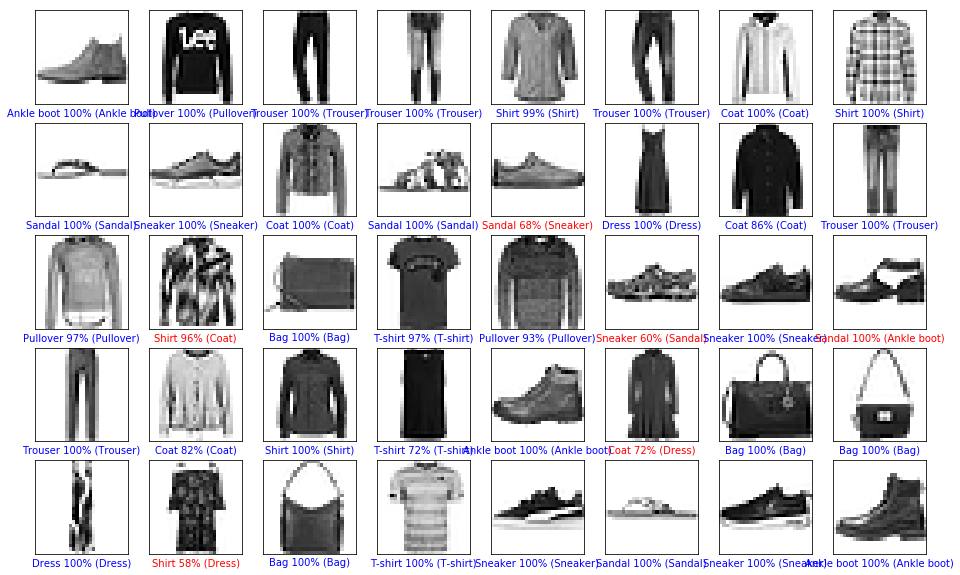

In [40]:
def plot_image(i, y_pred, y_test_class, img):
    y_pred, y_test_class, img = y_pred[i], y_test_class[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(y_pred)
    if predicted_label == y_test_class:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(y_pred),
                                class_names[y_test_class]),
                                color=color)

    
num_rows = 5
num_cols = 8
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, y_pred, y_test, X_test.reshape(10000, 28, 28))
plt.show()   

In [112]:
data = pd.read_csv('Admission_Predict.csv')

In [113]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [114]:
data.drop('Serial No.', axis =1, inplace=True)

In [115]:
y = data['Chance of Admit ']
X = data.drop('Chance of Admit ', axis =1)

In [116]:
scaler = StandardScaler()

In [117]:
X = scaler.fit_transform(X)

D:\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
X_train.shape

(300, 7)

In [120]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(7,)))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='relu'))

model.compile(loss='mean_absolute_error', metrics=['mse'], optimizer = 'adam')

In [121]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 9         
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/100
240/240 [==============================] - 0s 2ms/sample - loss: 0.3314 - mse: 0.1527 - val_loss: 0.2835 - val_mse: 0.1151
Epoch 2/100
240/240 [==============================] - 0s 129us/sample - loss: 0.2529 - mse: 0.0967 - val_loss: 0.2281 - val_mse: 0.0802
Epoch 3/100
240/240 [==============================] - 0s 96us/sample - loss: 0.2184 - mse: 0.0738 - val_loss: 0.1912 - val_mse: 0.0568
Epoch 4/100
240/240 [==============================] - 0s 82us/sample - loss: 0.1854 - mse: 0.0550 - val_loss: 0.1710 - val_mse: 0.0424
Epoch 5/100
240/240 [==============================] - 0s 113us/sample - loss: 0.1578 - mse: 0.0392 - val_loss: 0.1540 - val_mse: 0.0334
Epoch 6/100
240/240 [==============================] - 0s 116us/sample - loss: 0.1364 - mse: 0.0298 - val_loss: 0.1334 - val_mse: 0.0267
Epoch 7/100
240/240 [==============================] - 0s 125us/sample - loss: 0.1216 - mse: 0.0240 - val_loss: 0.1242 - val_mse: 0.0244


In [123]:
from sklearn.metrics import mean_absolute_error, r2_score

In [124]:
data.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [125]:
y_pred=  model.predict(X_test)

In [126]:
mean_absolute_error(y_test, y_pred)

0.0600249574780464

In [127]:
r2_score(y_test, y_pred)

0.7238029191720291

In [131]:
my_data = np.array([[500, 121, 5, 5,5, 10, 1],
                  [314, 103, 2, 4.5, 4.5, 6, 0]])

In [132]:
my_data = scaler.transform(my_data)

In [133]:
model.predict(my_data)

array([[2.2251475],
       [0.691541 ]], dtype=float32)

In [3]:
from tensorflow.keras.datasets import cifar10

In [6]:
data = cifar10.load_data()

In [5]:
from tensorflow.keras.applications import MobileNetV2